# Notebook Modélisation/ clustering

## Préparation du notebook

In [1]:
# Importer les librairies
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import decomposition
from functions import *
from sklearn import preprocessing
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import intercluster_distance
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE

In [3]:
# Paramétrage visuelle de Scikit-Learn
sklearn.set_config(display="diagram")

## Chargement du fichier

In [4]:
#chargement du fichier
data=pd.read_csv("export_df-P5.csv",encoding="utf-8")
data.shape

(93103, 9)

In [5]:
data

,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen,freight_moyen,Recency,mean_installments,Delai_livraison_moy
0,1,1.0,5.0,141.90,141.90,12.00,174,8.0,6.0
1,1,1.0,4.0,27.19,27.19,8.29,177,1.0,3.0
2,1,1.0,3.0,86.22,86.22,17.22,600,8.0,25.0
3,1,1.0,4.0,43.62,43.62,17.63,384,4.0,20.0
4,1,1.0,5.0,196.89,196.89,16.89,351,6.0,13.0
...,...,...,...,...,...,...,...,...,...
93098,1,2.0,5.0,2067.42,2067.42,248.71,510,10.0,27.0
93099,1,1.0,4.0,84.58,84.58,19.69,325,1.0,30.0
93100,1,1.0,5.0,112.46,112.46,22.56,631,1.0,14.0
93101,1,1.0,5.0,133.69,133.69,18.69,182,5.0,11.0


# PCA

In [6]:
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

In [7]:
features = data.columns
pca = decomposition.PCA(n_components=len(features))
pca.fit(data_scaled)

PCA(n_components=9)

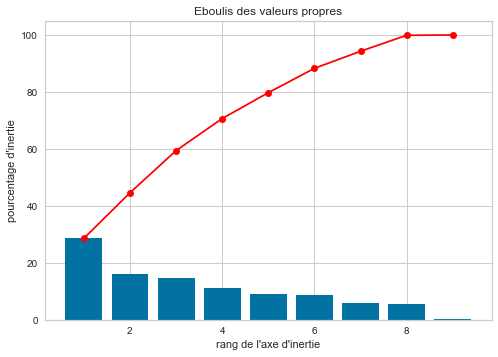

In [8]:
display_scree_plot(pca)

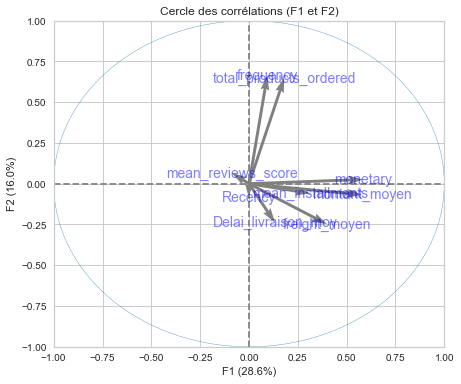

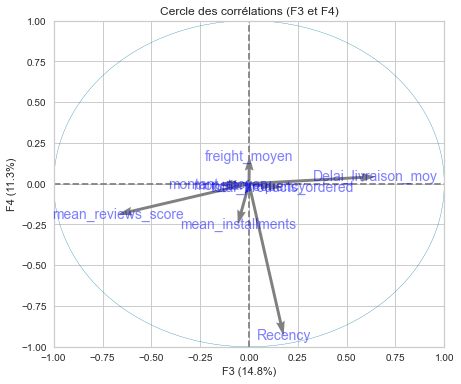

In [9]:
pcs = pca.components_
display_circles(pcs, 8, pca, [(0,1),(2,3)], labels = np.array(features))


plt.show()

## K-means sur les 9 features

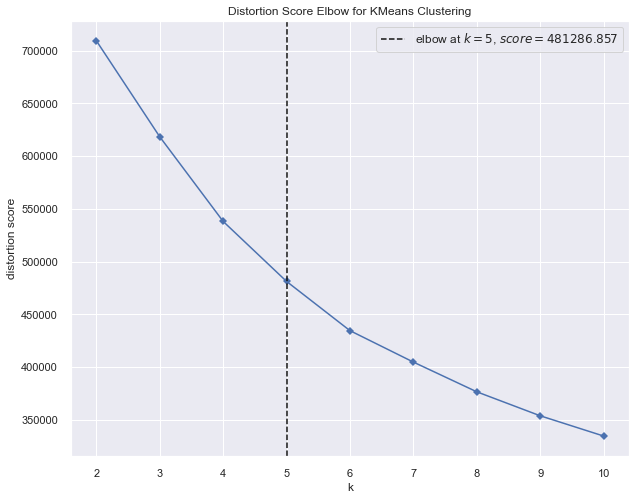

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [194]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(data_scaled)
visualizer.show()

In [195]:
km = KMeans(n_clusters=5, random_state=0)

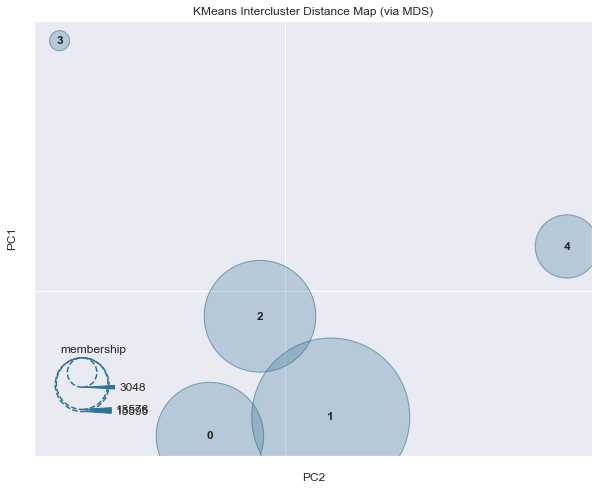

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=5, random_state=0))

In [196]:
intercluster_distance(KMeans(5, random_state=0), data_scaled)

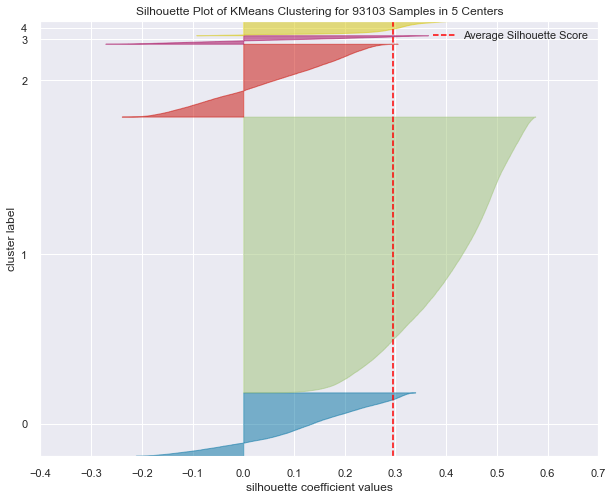

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93103 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [197]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(data_scaled)
visualizer.show()

In [198]:
n_comp = 2
pca = PCA(n_components=n_comp)
features = data.columns
data_pca = pca.fit_transform(data_scaled)
pcs = pca.components_

#### Silhouette

In [199]:
silhouette = []
k = list(range(2, 11))

In [200]:
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    y_pred = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette.append(score)

In [201]:
silhouette

[0.5304944049724297,
 0.5351310894664354,
 0.31701683014704823,
 0.2949579486228883,
 0.20857033623105461,
 0.2174920111494793,
 0.22768301779810562,
 0.23280177582815562,
 0.23769408116563367]

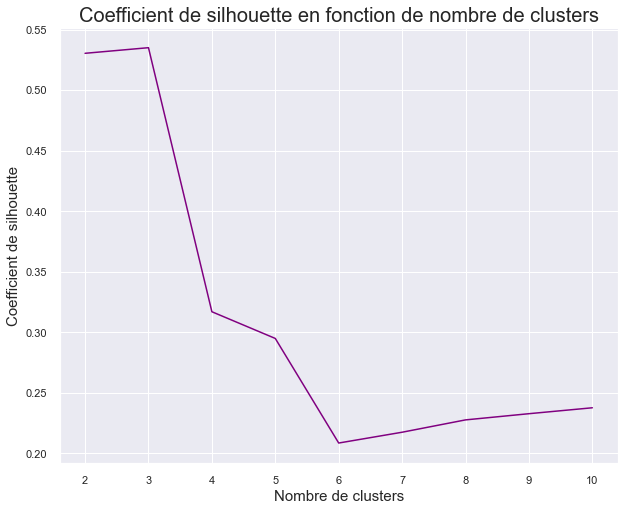

In [202]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Nombre de clusters', fontsize=15)
ax.set_ylabel('Coefficient de silhouette', fontsize=15)
ax.set_title(
    'Coefficient de silhouette en fonction de nombre de clusters', fontsize=20)

plt.plot(k, silhouette, color="purple")

### K-means après PCA sur 9 features

In [181]:
n_comp = 2
pca = PCA(n_components=n_comp)
features = data.columns
data_pca = pca.fit_transform(data_scaled)
pcs = pca.components_

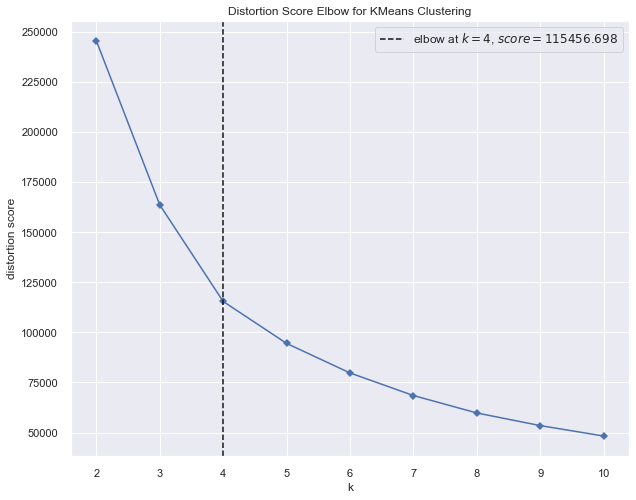

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [182]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(data_pca)
visualizer.show()

In [183]:
km = KMeans(n_clusters=4, random_state=0)

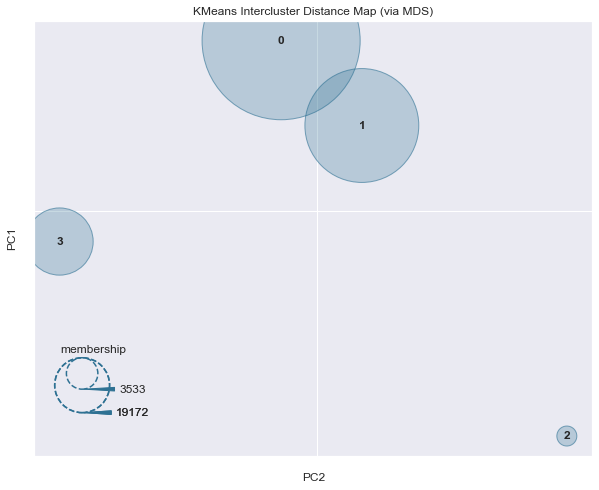

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=4, random_state=0))

In [184]:
intercluster_distance(KMeans(4, random_state=0), data_pca)

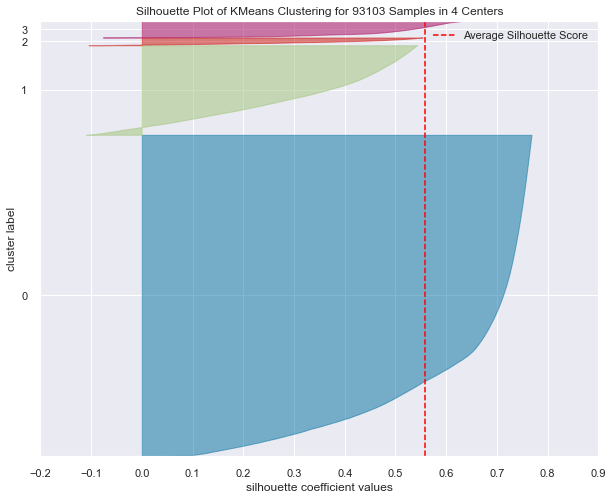

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93103 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [185]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(data_pca)
visualizer.show()

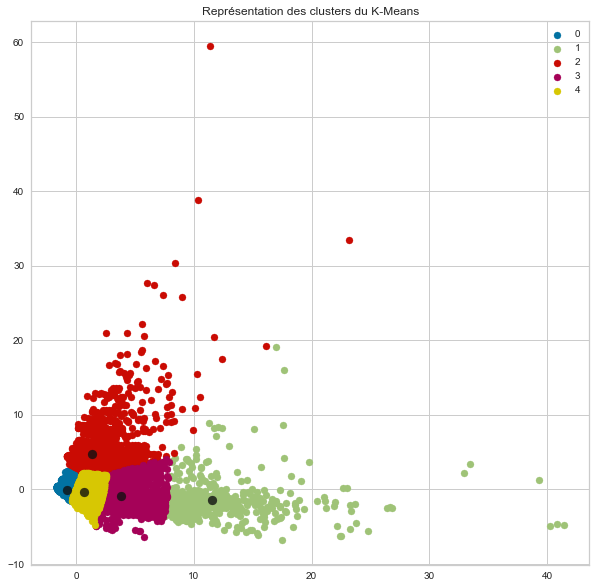

In [19]:
# Fitting KMeans
km = KMeans(n_clusters=5, random_state=0)

# Prediction
label = km.fit_predict(data_pca)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(data_pca[label==i, 0], data_pca[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

## K-means avec features RFM

In [20]:
RFM=data[['Recency','frequency','monetary']]

In [21]:
std_scale = preprocessing.StandardScaler().fit(RFM)
RFM_scaled = std_scale.transform(RFM)

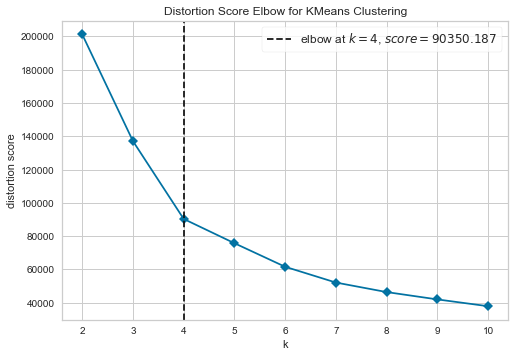

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(RFM_scaled)
visualizer.show()

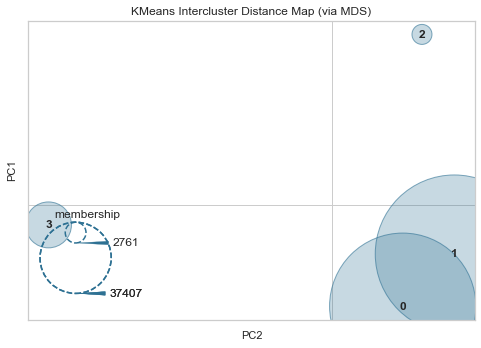

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=4, random_state=0))

In [25]:
intercluster_distance(KMeans(4, random_state=0), RFM_scaled)

In [28]:
km = KMeans(n_clusters=4, random_state=0)

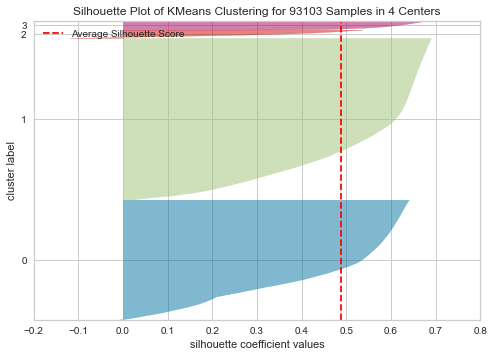

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93103 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(RFM_scaled)
visualizer.show()

In [23]:
n_comp = 2
pca = PCA(n_components=n_comp)
features = RFM.columns
data_pca = pca.fit_transform(RFM_scaled)
pcs = pca.components_

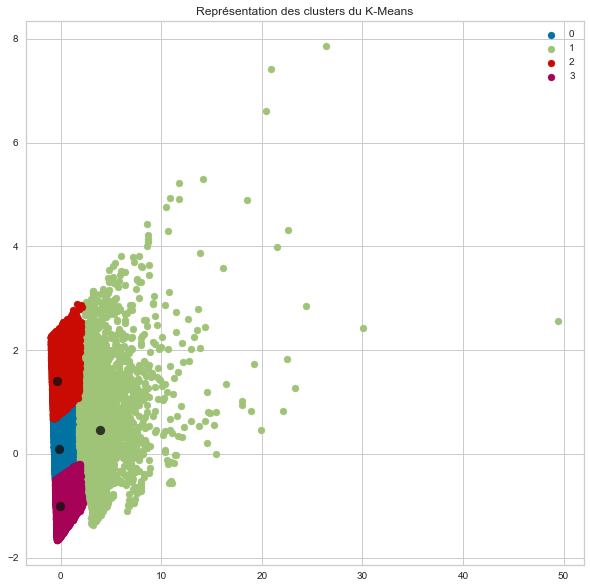

In [24]:
# Fitting KMeans
km = KMeans(n_clusters=4, random_state=0)

# Prediction
label = km.fit_predict(data_pca)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(data_pca[label==i, 0], data_pca[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

## K-means sur 4 features: 
### 'montant_moyen', 'Recency', 'mean_installments','mean_reviews_score'

In [30]:
data4=data[['montant_moyen', 'Recency', 'mean_installments','mean_reviews_score']]

In [31]:
std_scale = preprocessing.StandardScaler().fit(data4)
data4_scaled = std_scale.transform(data4)

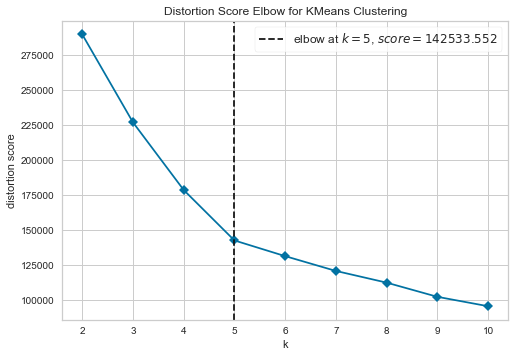

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(data4_scaled)
visualizer.show()

In [33]:
km = KMeans(n_clusters=4, random_state=0)

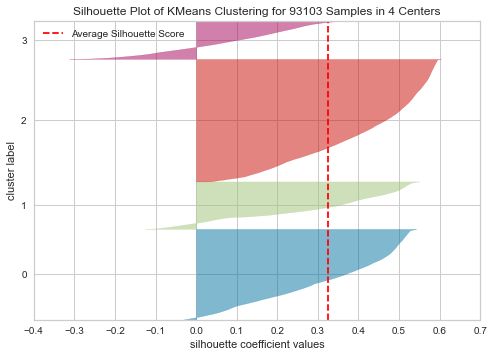

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93103 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(data4_scaled)
visualizer.show()

In [35]:
silhouette = []
k = list(range(2, 11))

In [36]:
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    y_pred = kmeans.fit_predict(data4_scaled)
    score = silhouette_score(data4_scaled, kmeans.labels_)
    silhouette.append(score)

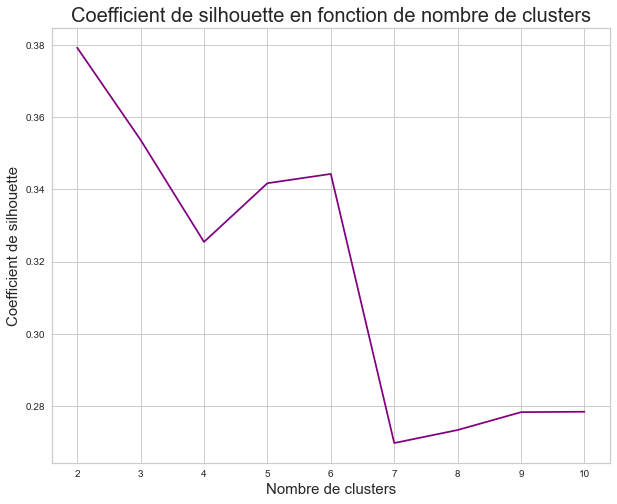

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Nombre de clusters', fontsize=15)
ax.set_ylabel('Coefficient de silhouette', fontsize=15)
ax.set_title(
    'Coefficient de silhouette en fonction de nombre de clusters', fontsize=20)

plt.plot(k, silhouette, color="purple")

In [49]:
km = KMeans(n_clusters=5, random_state=0)

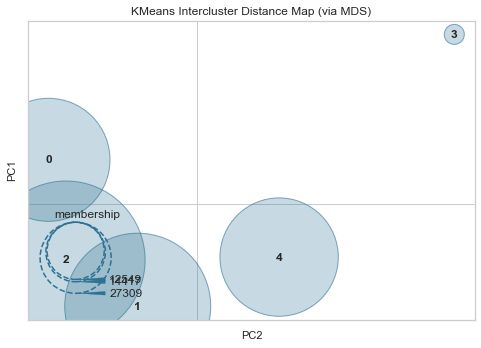

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=5, random_state=0))

In [50]:
intercluster_distance(KMeans(5, random_state=0), data4_scaled)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


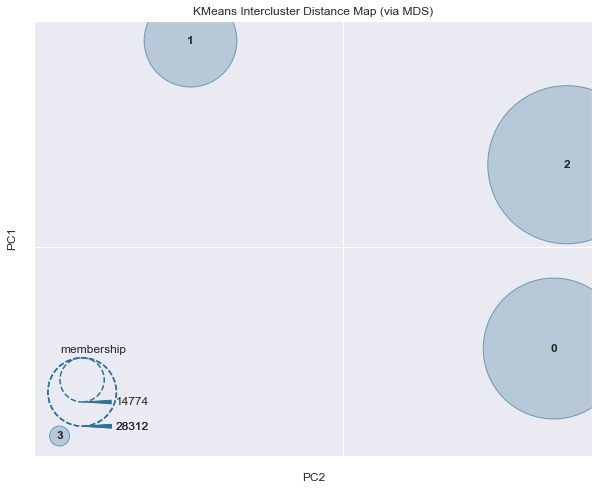

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=4, random_state=0))

In [180]:
intercluster_distance(KMeans(4, random_state=0), data4_scaled)

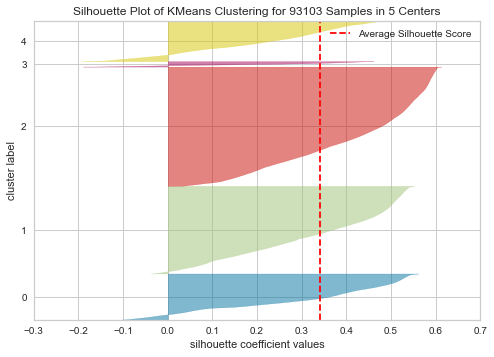

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93103 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(data4_scaled)
visualizer.show()

In [41]:
data4["Cluster"] = km.labels_
data4.groupby('Cluster').agg({
    'montant_moyen' : "mean",
    'Recency': "mean",
    'mean_installments': "mean",
    'mean_reviews_score': "mean"}).round(2)

<ipython-input-41-9b21727786a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["Cluster"] = km.labels_


,montant_moyen,Recency,mean_installments,mean_reviews_score
Cluster,,,,
0,114.08,454.28,2.14,4.63
1,139.14,294.03,2.54,1.66
2,115.55,184.11,1.93,4.68
3,419.83,306.07,8.26,4.31


In [189]:
tfs_embedded = TSNE(
    n_components=2, perplexity=40, verbose=2
    ).fit_transform(data4_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 93103 samples in 0.806s...
[t-SNE] Computed neighbors for 93103 samples in 9.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 93103
[t-SNE] Computed conditional probabilities for sample 2000 / 93103
[t-SNE] Computed conditional probabilities for sample 3000 / 93103
[t-SNE] Computed conditional probabilities for sample 4000 / 93103
[t-SNE] Computed conditional probabilities for sample 5000 / 93103
[t-SNE] Computed conditional probabilities for sample 6000 / 93103
[t-SNE] Computed conditional probabilities for sample 7000 / 93103
[t-SNE] Computed conditional probabilities for sample 8000 / 93103
[t-SNE] Computed conditional probabilities for sample 9000 / 93103
[t-SNE] Computed conditional probabilities for sample 10000 / 93103
[t-SNE] Computed conditional probabilities for sample 11000 / 93103
[t-SNE] Computed conditional probabilities for sample 12000 / 93103
[t-SNE] Computed conditional probabilities for sa

[t-SNE] Iteration 850: error = 2.3473442, gradient norm = 0.0001276 (50 iterations in 41.939s)
[t-SNE] Iteration 900: error = 2.2574930, gradient norm = 0.0001155 (50 iterations in 42.472s)
[t-SNE] Iteration 950: error = 2.1766531, gradient norm = 0.0001054 (50 iterations in 42.242s)
[t-SNE] Iteration 1000: error = 2.1034591, gradient norm = 0.0000972 (50 iterations in 40.830s)
[t-SNE] KL divergence after 1000 iterations: 2.103459


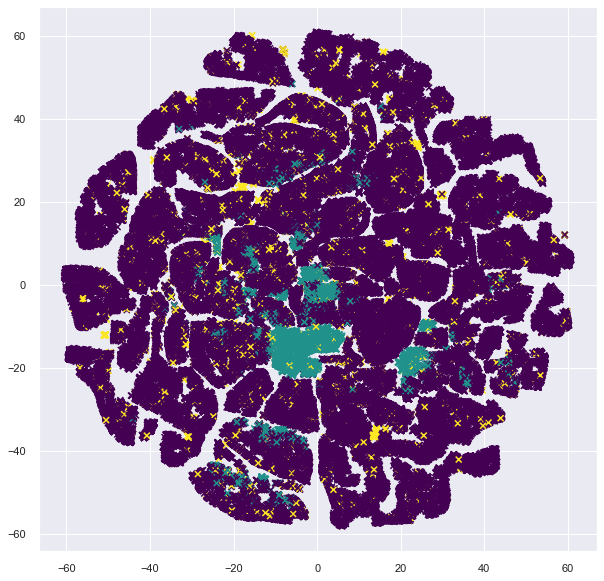

In [190]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(
    tfs_embedded[:, 0],
    tfs_embedded[:, 1],
    marker='x',
    c=kmeans.labels_,
    cmap='viridis'
    )
plt.show()

In [42]:
km = KMeans(n_clusters=5, random_state=0)

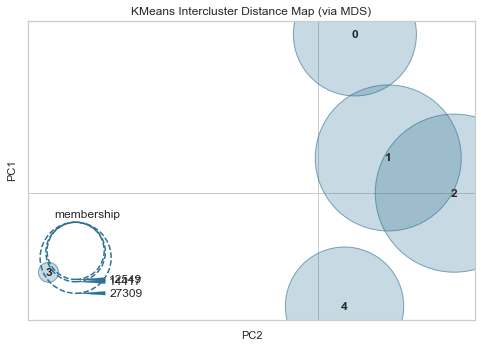

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=5, random_state=0))

In [43]:
intercluster_distance(KMeans(5, random_state=0), data4_scaled)

In [52]:
data4["Cluster"] = km.labels_
data4.groupby('Cluster').agg({
    'montant_moyen' : "mean",
    'Recency': "mean",
    'mean_installments': "mean",
    'mean_reviews_score': "mean"}).round(2)

<ipython-input-52-9b21727786a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["Cluster"] = km.labels_


,montant_moyen,Recency,mean_installments,mean_reviews_score
Cluster,,,,
0,138.80,293.85,2.39,1.66
1,114.26,455.46,2.00,4.63
2,115.62,183.85,1.82,4.68
3,1301.56,297.44,6.41,3.97
4,243.55,307.19,8.15,4.34


# Etude de la stabilité du clustering dans le temps

In [122]:
model=KMeans(n_clusters=4, random_state=0)

In [123]:
data_stability=data[['montant_moyen', 'Recency', 'mean_installments','mean_reviews_score']]

In [124]:
data_stability.shape

(93103, 4)

In [125]:
# recency entre 660 et 480 jours 
data_test_180d = data_stability.loc[data_stability["Recency"] > 480]

In [126]:
data_test_180d

,montant_moyen,Recency,mean_installments,mean_reviews_score
2,86.22,600,8.0,3.0
8,150.12,606,3.0,4.0
26,76.11,648,1.0,4.0
27,297.14,555,10.0,3.0
28,192.83,490,3.0,5.0
...,...,...,...,...
93081,32.42,580,3.0,5.0
93084,139.07,520,1.0,5.0
93098,2067.42,510,10.0,5.0
93100,112.46,631,1.0,5.0


In [127]:
customers_stability = data_stability.drop(index=data_test_180d.index)

In [128]:
scaler.fit(customers_stability)

StandardScaler(copy=False)

In [129]:
customers_test_stab_scaled = scaler.transform(customers_stability)
customers_test_stab_scaled

array([[-0.07425042, -0.70759057,  1.94154664,  0.66660237],
       [-0.62952636, -0.68107567, -0.70294252, -0.10183347],
       [-0.54999377,  1.14845263,  0.43040998, -0.10183347],
       ...,
       [ 0.04880001,  0.47674176, -0.32515835,  0.66660237],
       [-0.35171897,  0.62699287, -0.70294252, -0.10183347],
       [-0.11399251, -0.63688417,  0.80819414,  0.66660237]])

In [130]:
data_test_180d_scaled = scaler.transform(data_test_180d)

In [131]:
customers_stability_1 = customers_stability.loc[data_stability["Recency"] > 420]
customers_stability_1

,montant_moyen,Recency,mean_installments,mean_reviews_score
10,29.00,470,2.0,3.0
14,91.28,446,3.0,4.0
18,257.44,440,4.0,2.0
23,325.93,477,10.0,1.0
25,212.16,426,1.0,4.0
...,...,...,...,...
93068,142.50,447,1.0,5.0
93069,111.42,455,1.0,3.0
93085,50.09,427,4.0,5.0
93089,102.74,446,2.0,5.0


In [132]:
customers_stability_1_scaled = scaler.transform(customers_stability_1)
customers_stability_1_scaled

array([[-0.62076471,  1.90854651, -0.32515835, -0.87026932],
       [-0.31928632,  1.69642729,  0.05262581, -0.10183347],
       [ 0.4850433 ,  1.64339748,  0.43040998, -1.63870516],
       ...,
       [-0.51867448,  1.52849957,  0.43040998,  0.66660237],
       [-0.26381197,  1.69642729, -0.32515835,  0.66660237],
       [-0.49490668,  1.51082297, -0.70294252, -0.10183347]])

In [133]:
customers_stability_2 = customers_stability.loc[data_stability["Recency"] > 360]
customers_stability_2

,montant_moyen,Recency,mean_installments,mean_reviews_score
3,43.62,384,4.0,4.0
10,29.00,470,2.0,3.0
14,91.28,446,3.0,4.0
15,46.85,397,4.0,4.5
18,257.44,440,4.0,2.0
...,...,...,...,...
93083,62.94,399,3.0,4.0
93085,50.09,427,4.0,5.0
93089,102.74,446,2.0,5.0
93092,55.00,425,1.0,4.0


In [134]:
customers_stability_2_scaled = scaler.transform(customers_stability_2)
customers_stability_2_scaled

array([[-0.54999377,  1.14845263,  0.43040998, -0.10183347],
       [-0.62076471,  1.90854651, -0.32515835, -0.87026932],
       [-0.31928632,  1.69642729,  0.05262581, -0.10183347],
       ...,
       [-0.26381197,  1.69642729, -0.32515835,  0.66660237],
       [-0.49490668,  1.51082297, -0.70294252, -0.10183347],
       [-0.36808051,  0.98936321, -0.70294252,  0.66660237]])

In [135]:
customers_stability_3 = customers_stability.loc[data_stability["Recency"] > 300]
customers_stability_3

,montant_moyen,Recency,mean_installments,mean_reviews_score
3,43.62,384,4.0,4.0
4,196.89,351,6.0,5.0
10,29.00,470,2.0,3.0
11,126.26,346,1.0,5.0
14,91.28,446,3.0,4.0
...,...,...,...,...
93093,265.80,308,1.0,4.0
93095,81.20,366,1.0,5.0
93096,73.16,318,1.0,5.0
93097,167.32,308,2.0,5.0


In [136]:
customers_stability_3_scaled = scaler.transform(customers_stability_3)
customers_stability_3_scaled

array([[-0.54999377,  1.14845263,  0.43040998, -0.10183347],
       [ 0.19193931,  0.8567887 ,  1.18597831,  0.66660237],
       [-0.62076471,  1.90854651, -0.32515835, -0.87026932],
       ...,
       [-0.40699969,  0.56512477, -0.70294252,  0.66660237],
       [ 0.04880001,  0.47674176, -0.32515835,  0.66660237],
       [-0.35171897,  0.62699287, -0.70294252, -0.10183347]])

In [137]:
customers_stability_4 = customers_stability.loc[data_stability["Recency"] > 240]
customers_stability_4

,montant_moyen,Recency,mean_installments,mean_reviews_score
3,43.62,384,4.0,4.0
4,196.89,351,6.0,5.0
7,419.18,245,3.0,1.0
10,29.00,470,2.0,3.0
11,126.26,346,1.0,5.0
...,...,...,...,...
93093,265.80,308,1.0,4.0
93095,81.20,366,1.0,5.0
93096,73.16,318,1.0,5.0
93097,167.32,308,2.0,5.0


In [138]:
customers_stability_4_scaled = scaler.transform(customers_stability_4)
customers_stability_4_scaled

array([[-0.54999377,  1.14845263,  0.43040998, -0.10183347],
       [ 0.19193931,  0.8567887 ,  1.18597831,  0.66660237],
       [ 1.26797705, -0.0800712 ,  0.05262581, -2.40714101],
       ...,
       [-0.40699969,  0.56512477, -0.70294252,  0.66660237],
       [ 0.04880001,  0.47674176, -0.32515835,  0.66660237],
       [-0.35171897,  0.62699287, -0.70294252, -0.10183347]])

In [139]:
customers_stability_5 = customers_stability.loc[data_stability["Recency"] > 180]
customers_stability_5

,montant_moyen,Recency,mean_installments,mean_reviews_score
3,43.62,384,4.0,4.0
4,196.89,351,6.0,5.0
5,166.98,209,8.0,4.0
6,35.38,194,1.0,4.0
7,419.18,245,3.0,1.0
...,...,...,...,...
93095,81.20,366,1.0,5.0
93096,73.16,318,1.0,5.0
93097,167.32,308,2.0,5.0
93099,84.58,325,1.0,4.0


In [140]:
customers_stability_5_scaled = scaler.transform(customers_stability_5)
customers_stability_5_scaled

array([[-0.54999377,  1.14845263,  0.43040998, -0.10183347],
       [ 0.19193931,  0.8567887 ,  1.18597831,  0.66660237],
       [ 0.04715417, -0.39825004,  1.94154664, -0.10183347],
       ...,
       [ 0.04880001,  0.47674176, -0.32515835,  0.66660237],
       [-0.35171897,  0.62699287, -0.70294252, -0.10183347],
       [-0.11399251, -0.63688417,  0.80819414,  0.66660237]])

In [141]:
customers_stability_6 = customers_stability.loc[data_stability["Recency"] > 120]
customers_stability_6

,montant_moyen,Recency,mean_installments,mean_reviews_score
0,141.90,174,8.0,5.0
1,27.19,177,1.0,4.0
3,43.62,384,4.0,4.0
4,196.89,351,6.0,5.0
5,166.98,209,8.0,4.0
...,...,...,...,...
93095,81.20,366,1.0,5.0
93096,73.16,318,1.0,5.0
93097,167.32,308,2.0,5.0
93099,84.58,325,1.0,4.0


In [142]:
customers_stability_6_scaled = scaler.transform(customers_stability_6)
customers_stability_6_scaled

array([[-0.07425042, -0.70759057,  1.94154664,  0.66660237],
       [-0.62952636, -0.68107567, -0.70294252, -0.10183347],
       [-0.54999377,  1.14845263,  0.43040998, -0.10183347],
       ...,
       [ 0.04880001,  0.47674176, -0.32515835,  0.66660237],
       [-0.35171897,  0.62699287, -0.70294252, -0.10183347],
       [-0.11399251, -0.63688417,  0.80819414,  0.66660237]])

In [143]:
customers_stability_7 = customers_stability.loc[data_stability["Recency"] > 60]
customers_stability_7

,montant_moyen,Recency,mean_installments,mean_reviews_score
0,141.90,174,8.0,5.0
1,27.19,177,1.0,4.0
3,43.62,384,4.0,4.0
4,196.89,351,6.0,5.0
5,166.98,209,8.0,4.0
...,...,...,...,...
93095,81.20,366,1.0,5.0
93096,73.16,318,1.0,5.0
93097,167.32,308,2.0,5.0
93099,84.58,325,1.0,4.0


In [144]:
customers_stability_7_scaled = scaler.transform(customers_stability_7)
customers_stability_7_scaled

array([[-0.07425042, -0.70759057,  1.94154664,  0.66660237],
       [-0.62952636, -0.68107567, -0.70294252, -0.10183347],
       [-0.54999377,  1.14845263,  0.43040998, -0.10183347],
       ...,
       [ 0.04880001,  0.47674176, -0.32515835,  0.66660237],
       [-0.35171897,  0.62699287, -0.70294252, -0.10183347],
       [-0.11399251, -0.63688417,  0.80819414,  0.66660237]])

In [145]:
model=KMeans(n_clusters=4, random_state=0)

In [146]:
model.fit(data_test_180d_scaled)

KMeans(n_clusters=4, random_state=0)

In [147]:
label0 = model.predict(customers_test_stab_scaled)

In [148]:
label0

array([2, 1, 1, ..., 1, 1, 1])

In [149]:
stability = pd.DataFrame({"label_begin" : label0},
                         index=customers_stability.index)

Text(0.5, 1.0, 'Répartition des clients par cluster')

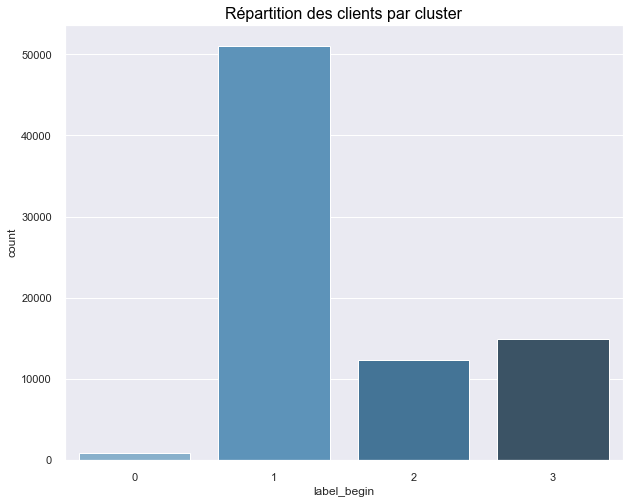

In [186]:
ax=sns.countplot(x="label_begin",data=stability, palette="Blues_d")
sns.set(rc={'figure.figsize':(10,8)})
plt.title("Répartition des clients par cluster", fontsize=16, color='black')

In [151]:
model.fit(data_test_180d_scaled)
label0 = model.predict(customers_test_stab_scaled)
stability["label_0mois"] = label0

In [152]:
model.fit(customers_stability_1_scaled)
label1 = model.predict(customers_test_stab_scaled)
stability["label_2mois"] = label1

In [153]:
model.fit(customers_stability_2_scaled)
label2 = model.predict(customers_test_stab_scaled)
stability["label_4mois"] = label1

In [154]:
model.fit(customers_stability_3_scaled)
label3 = model.predict(customers_test_stab_scaled)
stability["label_6mois"] = label3

In [155]:
model.fit(customers_stability_4_scaled)
label4 = model.predict(customers_test_stab_scaled)
stability["label_8mois"] = label4

In [156]:
model.fit(customers_stability_5_scaled)
label5 = model.predict(customers_test_stab_scaled)
stability["label_10mois"] = label5

In [157]:
model.fit(customers_stability_6_scaled)
label6 = model.predict(customers_test_stab_scaled)
stability["label_12mois"] = label6

In [158]:
model.fit(customers_stability_7_scaled)
label7 = model.predict(customers_test_stab_scaled)
stability["label_14mois"] = label7

In [159]:

print("ARI à 0 mois :", \
      adjusted_rand_score(stability['label_begin'], \
                          stability["label_0mois"]))
print("ARI à 2 mois :", \
      adjusted_rand_score(stability['label_begin'], \
                          stability["label_2mois"]))
print("ARI à 4 mois :", \
      adjusted_rand_score(stability["label_begin"], \
                          stability["label_4mois"]))
print("ARI à 6 mois :", \
      adjusted_rand_score(stability["label_begin"], \
                          stability["label_6mois"]))
print("ARI à 8 mois :", \
      adjusted_rand_score(stability["label_begin"], \
                          stability["label_8mois"]))
print("ARI à 10 mois :", \
      adjusted_rand_score(stability["label_begin"], \
                          stability["label_10mois"]))
print("ARI à 12 mois :", \
      adjusted_rand_score(stability["label_begin"], \
                          stability["label_12mois"]))
print("ARI à 14 mois :", \
      adjusted_rand_score(stability["label_begin"], \
                          stability["label_14mois"]))

ARI à 0 mois : 1.0
ARI à 2 mois : 0.9101631849485732
ARI à 4 mois : 0.9101631849485732
ARI à 6 mois : 0.9746225991295343
ARI à 8 mois : 0.9589928247552101
ARI à 10 mois : 0.9488060258254641
ARI à 12 mois : 0.9463408420863055
ARI à 14 mois : 0.41696758932715405


In [160]:
ari = pd.DataFrame({'ARI': pd.Series([1.0, 0.91, 0.91, 0.97, 0.96, 0.95, 0.94 , 0.41], 
                                             index = ['0mois', '2mois', '4mois','6mois', '8mois', '10mois','12mois', '14mois'])}) 
ari

,ARI
0mois,1.00
2mois,0.91
4mois,0.91
6mois,0.97
8mois,0.96
10mois,0.95
12mois,0.94
14mois,0.41


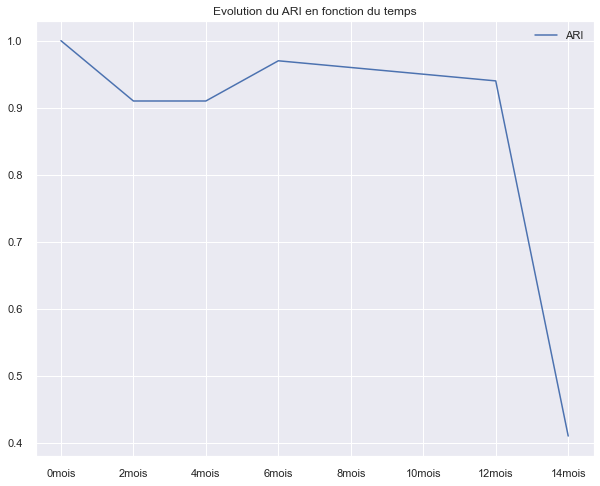

In [161]:
from pylab import *
plt.plot(ari,label="ARI")
plt.title("Evolution du ARI en fonction du temps")
plt.legend()
show()